In [82]:
import sys 
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np 
import os 
import pandas as pd

np.random.seed(42)

%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt


### ### ### ### ### ### ### ### 

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

import tensorflow as tf 
from tensorflow import keras

from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

## Perceptrons

In [32]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int) 

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,.5]])

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255. # @note no need to type 255.0 

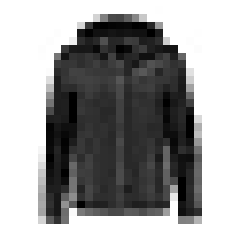

In [14]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [16]:
## Corresponding class names for each of the labels (0-9)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

10

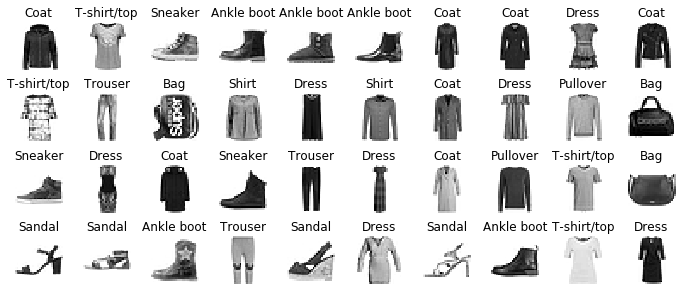

In [26]:
## Let's look at sample of images in the dataset 
nrows = 4 
ncols = 10 
plt.figure(figsize=(ncols*1.2, nrows*1.2))
for row in range(nrows):
    for col in range(ncols): 
        index = ncols * row + col 
        plt.subplot(nrows, ncols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest') 
        plt.title(class_names[y_train[index]], fontsize=12)
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5) ## Add space between subplots 

## Creating the model using the sequential API 

In [37]:
model = keras.models.Sequential() 
model.add(keras.layers.Flatten(input_shape=[28,28])) ## Only flatten input, applies X.reshape(-1,1)
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

'''Alternatively:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape[28,28]),
    keras.layers.Dense(300, activation='relu'),
    ...
    ...
])
''';

In [38]:
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [42]:
## Can get individual layers - by index or name 
print("Model layers:\n", model.layers)

print(model.layers[1].name)
hidden1 = model.layers[1]
print(model.get_layer('dense_9') is hidden1) 

Model layers:
 [<tensorflow.python.keras.layers.core.Flatten object at 0x7fea42779048>, <tensorflow.python.keras.layers.core.Dense object at 0x7fea427798d0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fea42779da0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fea427605c0>]
dense_9
True


In [50]:
## Params can be accessed and modified with get_weights() and set_weights() 
weights, biases = hidden1.get_weights()
# model.get_weights() # -> gets u weights and biases for all layers 

print("Weights Shape ", weights.shape) # initialized randomly to avoid symmetry (and neurons doing same computations)
print("Biases Shape ", biases.shape) # initalized to be equal to 0 

Weights Shape  (784, 300)
Biases Shape  (300,)


In [51]:
## Set the model loss and optimizer 
## .. in the compile() method 
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='sgd',
             metrics='accuracy')

In [52]:
## Training and evaluating the model 
history = model.fit(X_train, y_train, epochs=30, 
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7229 - accuracy: 0.7602 - val_loss: 0.5025 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4926 - accuracy: 0.8303 - val_loss: 0.4461 - val_accuracy: 0.8452
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4475 - accuracy: 0.8429 - val_loss: 0.4244 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4205 - accuracy: 0.8525 - val_loss: 0.3990 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4006 - accuracy: 0.8578 - val_loss: 0.3889 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3824 - accuracy: 0.8653 - val_loss: 0.3702 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3699 - accuracy: 0.8687 - val_loss: 0.3666 - val_accuracy:

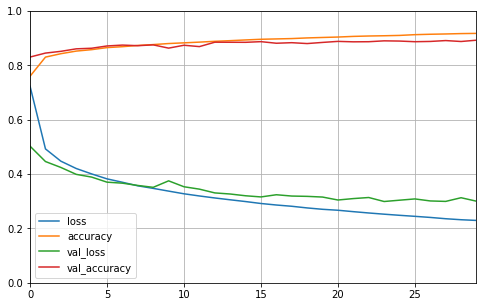

In [54]:
## Use History object returend by fit() method 
## to look at loss and other metrics 
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) ## Set vertical range to (0,1)
plt.show()

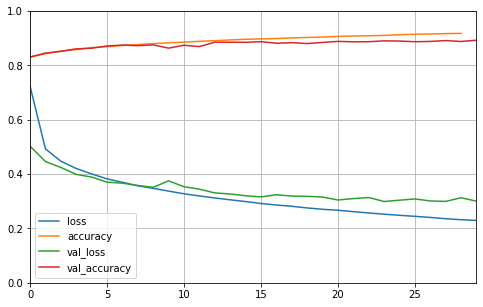

In [61]:
## Training Accuracy shifted one to the left, as it calculated as a running mena 
## while the validation accuracy is calculated at the end of every epoch 
df_history = pd.DataFrame(history.history)
df_history['accuracy'] = df_history['accuracy'].shift(-1)
df_history.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) ## Set vertical range to (0,1)
plt.show()

In [63]:
## Evaluate performance on test set
## Normal to get higher validation accuracy, 
## .. because params are tuned on the validation set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 947us/step - loss: 72.3948 - accuracy: 0.8409


[72.3947982788086, 0.8409000039100647]

In [65]:
## Making predic tions 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [67]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [68]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

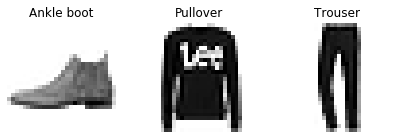

In [80]:
plt.figure(figsize=(7,2))
for index, x in enumerate(X_new):
    plt.subplot(1,3,index+1)
    plt.imshow(x, cmap='binary', interpolation='nearest')
    plt.title(class_names[y_new[index]])
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)


## Building a Regression MLP Using the Sequential API 

In [83]:
housing = fetch_california_housing() 

In [95]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)


In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [97]:
## Use the Sequential API to build, train evaluate and use a regression MLP 
## .. to make predictions (similiar to classification) 

## Note: Here, using only a single node (outputting a single value) 
## .. and not using an activation function 
## Loss function => MSE 

## To avoid overfitting, use only a single hidden layer with fewer neurons 
## .. as the dataset is quite noisy 

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
mse_test =  model.evaluate(X_test,y_test)

Epoch 1/20
363/363 [==============================] - 0s 729us/step - loss: 1.1727 - val_loss: 1.1536
Epoch 2/20
363/363 [==============================] - 0s 629us/step - loss: 0.6651 - val_loss: 0.4437
Epoch 3/20
363/363 [==============================] - 0s 559us/step - loss: 0.5050 - val_loss: 0.4640
Epoch 4/20
363/363 [==============================] - 0s 627us/step - loss: 0.4843 - val_loss: 0.4150
Epoch 5/20
363/363 [==============================] - 0s 609us/step - loss: 0.4620 - val_loss: 0.4383
Epoch 6/20
363/363 [==============================] - 0s 570us/step - loss: 0.4600 - val_loss: 0.4858
Epoch 7/20
363/363 [==============================] - 0s 557us/step - loss: 0.4488 - val_loss: 0.5293
Epoch 8/20
363/363 [==============================] - 0s 554us/step - loss: 0.4376 - val_loss: 0.6564
Epoch 9/20
363/363 [==============================] - 0s 565us/step - loss: 0.4348 - val_loss: 0.6297
Epoch 10/20
363/363 [==============================] - 0s 553us/step - loss: 0.435

## Building Complex Models Using the Functional API 

The Sequential model, are commonly used, but it is more useful to build NN with more complex topologies

In [103]:
## Wide and deep models are NN where parts of the input (not necessarily all) are connected to the output 
## A regualar MLP forces the data to flow through the full stack of layers 

## Complex patterns are learnt through the deep path while simple pattern are learnt using the simple path 

input_ = keras.layers.Input(shape=X_train.shape[1:]) # Create an input object
hidden1 = keras.layers.Dense(30, activation='relu')(input_) # Create a dense layer, pass it in the input
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) # Create another dense layer, passing it the output of 1st layer
concat = keras.layers.Concatenate()([input_, hidden2]) # Concat input and output of second layer 
output = keras.layers.Dense(1)(concat) # Create output layer
model = keras.Model(inputs = [input_], outputs=[output]) # Create Keras model 

In [108]:
## What if want to send a subset of features through the wide path 
## .. and a diff. subset through the deep patth 
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A,input_B], outputs=[output])

In [111]:
## Because model has 2 inputs, need to pass a pair of matrices (X_train_A, X_train_B)
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

## Note that the different inputs can be overlapping, see below: 
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
X_val_A, X_val_B = X_val[:,:5], X_val[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]

X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                   validation_data=((X_val_A,X_val_B),y_val))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))




Epoch 1/20
363/363 [==============================] - 0s 849us/step - loss: 2.5129 - val_loss: 0.9990
Epoch 2/20
363/363 [==============================] - 0s 647us/step - loss: 0.8402 - val_loss: 0.6904
Epoch 3/20
363/363 [==============================] - 0s 605us/step - loss: 0.6828 - val_loss: 0.6163
Epoch 4/20
363/363 [==============================] - 0s 601us/step - loss: 0.6375 - val_loss: 0.5814
Epoch 5/20
363/363 [==============================] - 0s 605us/step - loss: 0.6117 - val_loss: 0.5556
Epoch 6/20
363/363 [==============================] - 0s 604us/step - loss: 0.5923 - val_loss: 0.5355
Epoch 7/20
363/363 [==============================] - 0s 600us/step - loss: 0.5769 - val_loss: 0.5193
Epoch 8/20
363/363 [==============================] - 0s 702us/step - loss: 0.5641 - val_loss: 0.5020
Epoch 9/20
363/363 [==============================] - 0s 599us/step - loss: 0.5525 - val_loss: 0.4887
Epoch 10/20
363/363 [==============================] - 0s 604us/step - loss: 0.543

In [112]:
## Multi output model 
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A,input_B], outputs=[output, aux_output])

In [113]:
## Need to give it two loss functions 
## .. and set higher weight to main output 
model.compile(loss=['mse','mse'], loss_weights=[.9,.1], optimizer='sgd')

## Provide labels for each output 
## Here we are predicting the same thing so pass a tuple of y_train x 2 
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20, 
    validation_data = ([X_val_A, X_val_B], [y_val,y_val]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9928 - main_output_loss: 0.8947 - aux_output_loss: 1.8753 - val_loss: 0.5970 - val_main_output_loss: 0.5241 - val_aux_output_loss: 1.2531
Epoch 2/20
363/363 [==============================] - 0s 786us/step - loss: 0.6428 - main_output_loss: 0.5745 - aux_output_loss: 1.2575 - val_loss: 0.5172 - val_main_output_loss: 0.4569 - val_aux_output_loss: 1.0599
Epoch 3/20
363/363 [==============================] - 0s 714us/step - loss: 0.5628 - main_output_loss: 0.5041 - aux_output_loss: 1.0906 - val_loss: 0.5065 - val_main_output_loss: 0.4579 - val_aux_output_loss: 0.9432
Epoch 4/20
363/363 [==============================] - 0s 693us/step - loss: 0.5493 - main_output_loss: 0.5033 - aux_output_loss: 0.9627 - val_loss: 0.5930 - val_main_output_loss: 0.5548 - val_aux_output_loss: 0.9367
Epoch 5/20
363/363 [==============================] - 0s 796us/step - loss: 0.6053 - main_output_loss: 0.5770 - aux_output_loss: 0.8603 - 

In [114]:
## Keras returns total, main and aux loss
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 495us/step - loss: 0.3994 - main_output_loss: 0.3883 - aux_output_loss: 0.4988


In [115]:
## Similarily for predictions, get preds for each output 
model.predict([X_new_A, X_new_B])

[array([[2.1612744],
        [1.7020338],
        [2.0079484]], dtype=float32), array([[2.3032331],
        [1.5547326],
        [2.1515439]], dtype=float32)]